<a href="https://colab.research.google.com/github/SoodSheetal/Time-Series-Analysis/blob/main/LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA COLLECTION

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import scipy

In [ ]:
# shareName = 'HDFCBANK.NS'
shareName = 'BHARATFORG.BO'            #stock name.
period = '25y'                         #timeframe
ticker = yf.Ticker(shareName)
dataset = ticker.history(period=period) #dataset variable.
dataset.reset_index(inplace=True)       #removing the existing index
dataset['Date'] = pd.to_datetime(dataset['Date']).dt.date                               #explanation of code for datetime function in the dataset (#dataframe is the input dataframe
dataset['Date'] = pd.to_datetime(dataset['Date'])                                       #to_datetime is the function used to convert datetime string to datetime
dataset.set_index('Date', inplace=True)#setting date as the index                       #DateTime is the datetime column in the dataframe

UNDERSTANDING OUR DATA

In [ ]:
dataset.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1998-02-02,4.698197,4.698197,4.698197,4.698197,721,0.0,0.0
1998-02-03,4.625914,4.640371,4.553635,4.575319,77794,0.0,0.0
1998-02-04,4.625914,4.625914,4.481354,4.488583,159383,0.0,0.0
1998-02-05,4.358479,4.553635,4.358479,4.539179,9280,0.0,0.0
1998-02-06,4.409075,4.553634,4.401846,4.488583,11858,0.0,0.0


In [ ]:
dataset.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [ ]:
dataset.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6269.000000,6269.000000,6269.000000,6269.000000,6.269000e+03,6269.000000,6269.000000
mean,237.481828,241.152124,233.131783,236.911768,2.668380e+05,0.008476,0.001117
std,238.207087,241.468904,234.379305,237.725452,5.163263e+05,0.134987,0.068011
min,3.324876,3.361016,0.004690,3.335718,0.000000e+00,0.000000,0.000000
25%,42.423907,43.602000,40.499556,42.434990,5.776400e+04,0.000000,0.000000
50%,134.864046,137.115306,132.527795,134.568207,1.223190e+05,0.000000,0.000000
75%,432.732393,439.282291,424.730771,431.516754,2.641330e+05,0.000000,0.000000
max,912.950012,919.500000,892.599976,908.849976,1.707567e+07,5.500000,5.000000


In [ ]:
#df.isnull() gives us all the data in boolean format and sum() sums up the boolean format and gives us the total and if it isn't zero then we have null entries
dataset.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

FILTERING RELEVANT DATA

In [ ]:
#filtering relevant data
Dataset = dataset[['Open', 'High', 'Low', 'Close', 'Volume']]
Dataset

,Open,High,Low,Close,Volume
Date,,,,,
1998-02-02,4.698197,4.698197,4.698197,4.698197,721
1998-02-03,4.625914,4.640371,4.553635,4.575319,77794
1998-02-04,4.625914,4.625914,4.481354,4.488583,159383
1998-02-05,4.358479,4.553635,4.358479,4.539179,9280
1998-02-06,4.409075,4.553634,4.401846,4.488583,11858
...,...,...,...,...,...
2023-01-24,879.000000,883.450012,865.849976,869.950012,10081
2023-01-25,868.599976,869.549988,849.349976,862.599976,20549
2023-01-27,869.950012,872.700012,839.950012,854.599976,34045


LINEARITY OF THE DATA USING CORRELATION MATRIX

In [ ]:
method = ['pearson', 'kendall', 'spearman']
corrMatrix =Dataset.corr(method=method[0])
corrMatrix.style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Volume
Open,1.000000,0.999798,0.999371,0.999575,-0.210582
High,0.999798,1.000000,0.999366,0.999829,-0.208595
Low,0.999371,0.999366,1.000000,0.999449,-0.210813
Close,0.999575,0.999829,0.999449,1.000000,-0.209092
Volume,-0.210582,-0.208595,-0.210813,-0.209092,1.000000


BASIC STATISTICS

In [ ]:
features=Dataset['Open']
mean=statistics.mean(features)
print('Mean of our feature is',mean)
median=statistics.median(features)
print('Median of our feature is',median)
mode=statistics.mode(features)
print('Mode of our feature is',mode)
sd=statistics.stdev(features)
print('Standard Deviation of our data is',sd)
print('Skewness of our feature is',features.skew())

Mean of our feature is 237.4818276829841
Median of our feature is 134.8640463861398
Mode of our feature is 6.866593837738037
Standard Deviation of our data is 238.20708665910692
Skewness of our feature is 0.9290177778497674


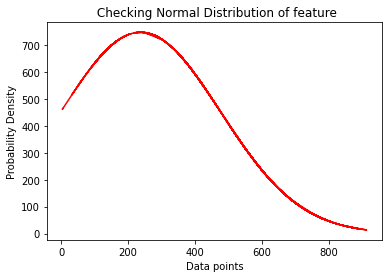

In [ ]:
#Checking skewness visually as according to our calculations data is right skewed
def normal_dist(features, mean, sd):
  prob_density = (np.pi * sd) * np.exp(-0.5 * ((features - mean) / sd) **2)
  return prob_density
pdf = normal_dist(features, mean, sd)
plt.plot(features, pdf, color='red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.title(' Checking Normal Distribution of feature')
plt.show()

0.026243168199601943


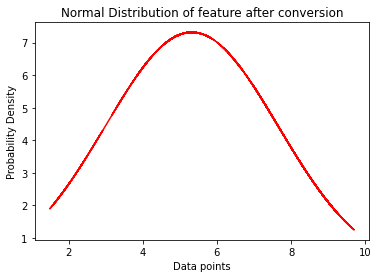

In [ ]:
#applying cube root transformation
new_feature= np.cbrt(features)
print(new_feature.skew())
#graphical check
mean1=statistics.mean(new_feature)
sd1=statistics.stdev(new_feature)
def normal_dist(new_feature, mean1, sd1):
  prob_density = (np.pi * sd1) * np.exp(-0.5 * ((new_feature - mean1) / sd1) **2)
  return prob_density
pdf = normal_dist(new_feature, mean1, sd1)
plt.plot(new_feature, pdf, color='red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of feature after conversion')
plt.show()

In [ ]:
#applying log transformation for other features
target=Dataset['Close']
target
new_target=np.cbrt(target)
new_target.skew()

0.02751645888854162

In [ ]:
#creating sample for the features
feature_sample=new_feature.iloc[::15]
print(feature_sample)
target_sample=new_target.iloc[::15]
print(target_sample)

Date
1998-02-02    1.674854
1998-02-23    1.612434
1998-03-16    1.732939
1998-04-06    1.845422
1998-04-27    1.880479
                ...   
2022-10-17    9.052686
2022-11-09    9.572254
2022-11-30    9.465247
2022-12-21    9.646662
2023-01-11    9.590275
Name: Open, Length: 418, dtype: float64
Date
1998-02-02    1.674854
1998-02-23    1.606854
1998-03-16    1.773692
1998-04-06    1.811554
1998-04-27    1.900701
                ...   
2022-10-17    9.173088
2022-11-09    9.572072
2022-11-30    9.505814
2022-12-21    9.552617
2023-01-11    9.528814
Name: Close, Length: 418, dtype: float64


LINEAR REGRESSION

In [ ]:
x=np.array(new_feature)#.reshape(-1,1)
x=x.reshape(-1,1)
x.shape

(6269, 1)

In [ ]:
y=new_target
y.shape

(6269,)

In [ ]:
# importing relevant modules and splitting the data
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LinearRegression
train_percent=0.7
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,train_size=train_percent,shuffle=False)

In [ ]:
# implemented linear regression
alg1=LinearRegression()   #y=mx+c -----> for 1-D REPRESENTATION
alg1.fit(x_train,y_train)
m=alg1.coef_
c=alg1.intercept_
print(alg1.coef_)   # gives us the coefficient i.e m
print(alg1.intercept_)  #gives us the constant i.e c
y_predict=alg1.predict(x_test)

[0.9984929]
0.0024785300083705053


Text(0.5, 1.0, 'Pattern of Predicted Value')

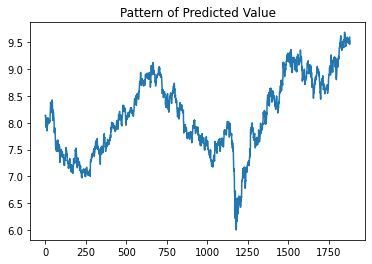

In [ ]:
plt.plot(y_predict)
plt.title('Pattern of Predicted Value')

Text(0.5, 1.0, 'Pattern of Testing Value')

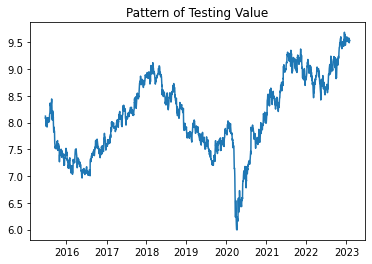

In [ ]:
plt.plot(y_test)
plt.title('Pattern of Testing Value')

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(metrics.mean_squared_error(y_test, y_predict)) #estimator measures the average of the squares of the errors
print(metrics.r2_score(y_test, y_predict))  #estatistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable . Best value is 1

0.0034483756244487874
0.9934504607453306


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(metrics.mean_absolute_error(y_test, y_predict))  #robust to outliers
print(sqrt(mean_squared_error(y_test, y_predict)))

0.04282685570517266
0.05872287139138197


In [ ]:
#coefficient of determination-----> how well it predicts the outcome
score_test=alg1.score(x_test,y_test)
score_train=alg1.score(x_train,y_train)
print(score_test)
print(score_train)

0.9934504607453306
0.9994798349480686


NEW DATAFRAME CREATING FOR TESTING ASSUMPTIONS

In [ ]:
#new dataframe
df_2 = pd.DataFrame({"Observed":y_predict,
                        "Actual":y_test})

In [ ]:
df_2.head()

,Observed,Actual
Date,,
2015-06-23,8.129624,8.119659
2015-06-24,8.142092,8.070152
2015-06-25,8.047383,8.098618
2015-06-26,8.090081,8.057168
2015-06-29,7.927411,7.947552


In [ ]:
#Adding residual column
df_2["Residuals"] = df_2["Observed"] - df_2["Actual"]
df_2

,Observed,Actual,Residuals
Date,,,
2015-06-23,8.129624,8.119659,0.009964
2015-06-24,8.142092,8.070152,0.071941
2015-06-25,8.047383,8.098618,-0.051234
2015-06-26,8.090081,8.057168,0.032913
2015-06-29,7.927411,7.947552,-0.020141
...,...,...,...
2023-01-24,9.567250,9.546220,0.021030
2023-01-25,9.529378,9.519259,0.010119
2023-01-27,9.534311,9.489740,0.044572


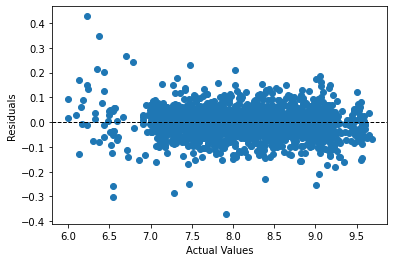

In [ ]:
#assumption 2
#Independence of errors - There is not a relationship between the residuals and open
plt.scatter(df_2['Actual'],df_2['Residuals'])
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0,color='black',linestyle='--',linewidth=1)
plt.show()

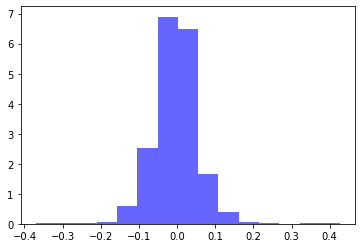

In [ ]:
#assumption 3 normality of errors
plt.hist(df_2['Residuals'], bins=15, density=True, alpha=0.6, color='b')

plt.show()

In [ ]:
x=np.arange(0,40)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


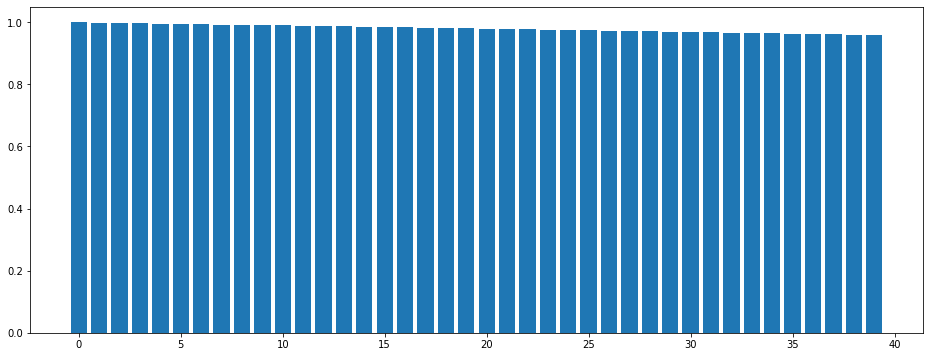

In [ ]:
#AUTOCORRELATION ----> kindly correct it
from statsmodels.tsa.stattools import acf, pacf
plt_1 = plt.figure(figsize=(16, 6))
ACF=acf(Dataset['Open'])
show=plt.bar(np.arange(0,40),ACF[0:40])

#plt.plot(ACF)